***Dataset Story***

* The data set named Online Retail - II includes the sales of an online store between 01/12/2009 - 09/12/2011.

* The product catalog of this company includes souvenirs.

* The majority of the company's customers are corporate customers.

Building of CRM strategies that overlap with customers’ expectations and needs and also adopt the insight of right customer, right product, right time, right offer is one of the most important approach to deepen customer relationships.

For this purpose, you want to build customer-oriented strategies. You aim to contact your customers with different campaigns, fictions and attractive messages. So which customer will you contact with which strategy? In summary, do you know the answers to the following questions?

* How recent was a customer's latest purchase? (Recency)

* How often a customer makes a purchase? (Frequency)

* How much money a customer spends on? (Monetary)

At this point, the most effective way of identifying your customers is to combine CRM with Analytics. ​“RFM Analysis” is an indispensable application of CRM Analytics which answers these questions and ensure to get deeply insights about customer habits.

In this study, below topics have been handled:

Calculating R, F, M values ,
Divide into groups according to RFM Scores
Personalize of marketing strategies for relevant segments.

****Business Problem & Goal:****
 
An e-commerce company thinks that doing marketing activities based on customer segments with common behaviors will increase income. For this reason, it is aimed to divide customers into segments and determine marketing strategies according to these segments.

***Variables Description:***

* InvoiceNo : The number of the invoice, unique per each purchase. Refund invoice numbers contain "C"

* StockCode : Unique code per each item

* Description : Name of the item

* Quantity : The number of items within the invoice

* InvoiceDate : Date and time of the purchase

* UnitPrice : Price of a single item, as of Sterlin

* CustomerID : Unique id number per each customer

* Country : The country where the customer is living


In [2]:
# Import Libraries:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta

# Setting Configurations:

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Import Warnings:

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)


# Import helpers Module

from shutil import copyfile
# copyfile(src = "eda.py", dst = "../working/eda.py")
# copyfile(src = "data_prep.py", dst = "../working/data_prep.py")

from data_prep import *
from eda import *


In [3]:
# Import Data:

# Reading the online retail dataset
df = pd.read_excel("online_retail_II.xlsx",sheet_name="Year 2010-2011")

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom


***Exploratory Data Analysis***

In [4]:
check_df(df)

##################### Shape #####################
(541910, 8)
##################### Types #####################
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object
##################### Head #####################
  Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  Price  Customer ID         Country  
0 2010-12-01 08:26:00  2.550    17850.000  United Kingdom  
1 2010-12-01 08:26:00  3.390    17850.000  U

In [5]:
# Categorical / Numerical / Cardinal Features: 

cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if ("ID" not in col) and ("Date" not in col) ]

Observations: 541910
Variables: 8
cat_cols: 0
num_cols: 4
cat_but_car: 4
num_but_cat: 0


The dataset includes 8 features in which there're 3 numerical columns and 5 categorical columns. But there is no column which has high cardinality

In [6]:
# Let's observe  numerical columns: 

for col in num_cols:
    num_summary(df,col)

count   541910.000
mean         9.552
std        218.081
min     -80995.000
5%           1.000
10%          1.000
20%          1.000
30%          2.000
40%          2.000
50%          3.000
60%          5.000
70%          8.000
80%         12.000
90%         24.000
95%         29.000
99%        100.000
max      80995.000
Name: Quantity, dtype: float64
count   541910.000
mean         4.611
std         96.760
min     -11062.060
5%           0.420
10%          0.630
20%          0.850
30%          1.250
40%          1.650
50%          2.080
60%          2.550
70%          3.750
80%          4.950
90%          7.950
95%          9.950
99%         18.000
max      38970.000
Name: Price, dtype: float64


In [7]:
# Missing Values:

missing_values_table(df)

             n_miss  ratio
Customer ID  135080 24.930
Description    1454  0.270


In [8]:
# Drop NA values:

df.dropna(inplace=True)
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [9]:
# Let's remove the returned product transactions (negative values -> Invoice Id contains value "C")

df_Invoice = pd.DataFrame({"Invoice":[row for row in df["Invoice"].values if "C"  not in str(row)]})
df_Invoice.head()
df_Invoice = df_Invoice.drop_duplicates("Invoice")

# The transactions except returned product transactions
df = df.merge(df_Invoice, on = "Invoice")


In [10]:
# Delete values less than or equal to 0 in the variables Quantity and Price

df = df[df["Quantity"] > 0]
df = df[df["Price"] > 0]

In [11]:
# Let's only observe outlier values but we don't need to handle outliers as a problem, because we'll be scoring the dataset.

for col in num_cols:
    grab_outliers(df,col)
 

   Invoice StockCode                      Description  Quantity  \
13  536367     84879    ASSORTED COLOUR BIRD ORNAMENT        32   
31  536370     10002      INFLATABLE POLITICAL GLOBE         48   
44  536370     22492          MINI PAINT SET VINTAGE         36   
46  536371     22086  PAPER CHAIN KIT 50'S CHRISTMAS         80   
65  536374     21258       VICTORIAN SEWING BOX LARGE        32   

           InvoiceDate  Price  Customer ID         Country  
13 2010-12-01 08:34:00  1.690    13047.000  United Kingdom  
31 2010-12-01 08:45:00  0.850    12583.000          France  
44 2010-12-01 08:45:00  0.650    12583.000          France  
46 2010-12-01 09:00:00  2.550    13748.000  United Kingdom  
65 2010-12-01 09:09:00 10.950    15100.000  United Kingdom  
   Invoice StockCode                     Description  Quantity  \
5   536365     22752    SET 7 BABUSHKA NESTING BOXES         2   
20  536367     22622  BOX OF VINTAGE ALPHABET BLOCKS         2   
23  536367     21777     RECIPE B

In [12]:
# Unique Number of Products (with Description)

df.Description.nunique()

3877

In [13]:
# Unique Number of Products (with StockCode)

df.StockCode.nunique()

3665

In [14]:
# The unique values of these 2 variables (Description & StockCode) should be equal, because each stock code represents a product.

# 1st Step
df_product = df[["Description","StockCode"]].drop_duplicates()
df_product = df_product.groupby(["Description"]).agg({"StockCode":"count"}).reset_index()


df_product.rename(columns={'StockCode':'StockCode_Count'},inplace=True)
df_product.head()

,Description,StockCode_Count
0,4 PURPLE FLOCK DINNER CANDLES,1
1,50'S CHRISTMAS GIFT BAG LARGE,1
2,DOLLY GIRL BEAKER,1
3,I LOVE LONDON MINI BACKPACK,1
4,I LOVE LONDON MINI RUCKSACK,1


In [15]:
df_product = df_product.sort_values("StockCode_Count", ascending=False)
df_product = df_product[df_product["StockCode_Count"]>1]

df_product.head()

,Description,StockCode_Count
2014,"METAL SIGN,CUPCAKE SINGLE HOOK",3
2471,PINK FLOWERS RABBIT EASTER,2
1077,EAU DE NILE JEWELLED PHOTOFRAME,2
2460,PINK FAIRY CAKE CUSHION COVER,2
3678,WHITE BAMBOO RIBS LAMPSHADE,2


In [16]:
# Let's delete products with more than one stock code 

df = df[~df["Description"].isin(df_product["Description"])]

print(df.StockCode.nunique())
print(df.Description.nunique())

3630
3858


In [17]:
# 2nd Step

df_product = df[["Description","StockCode"]].drop_duplicates()
df_product = df_product.groupby(["StockCode"]).agg({"Description":"count"}).reset_index()
df_product.rename(columns={'Description':'Description_Count'},inplace=True)
df_product = df_product.sort_values("Description_Count", ascending=False)
df_product = df_product[df_product["Description_Count"] > 1] 


df_product.head()


,StockCode,Description_Count
1990,23236,4
1950,23196,4
2104,23366,3
1886,23131,3
1994,23240,3


In [18]:
# Let's delete stock codes that represent multiple products

df = df[~df["StockCode"].isin(df_product["StockCode"])]

In [19]:
# Now each stock code represents a single product

print(df.StockCode.nunique())
print(df.Description.nunique())

3420
3420


In [20]:
# The post statement in the stock code shows the postage cost, let's delete it as it is not a product

df = df[~df["StockCode"].str.contains("POST", na=False)]

In [21]:
# Calculating Total Price:

df['TotalPrice'] = df['Quantity'] * df['Price']

In [22]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.650,17850.000,United Kingdom,15.300
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.250,17850.000,United Kingdom,25.500


***Calculating RFM Metrics***

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357405 entries, 2 to 397923
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      357405 non-null  object        
 1   StockCode    357405 non-null  object        
 2   Description  357405 non-null  object        
 3   Quantity     357405 non-null  int64         
 4   InvoiceDate  357405 non-null  datetime64[ns]
 5   Price        357405 non-null  float64       
 6   Customer ID  357405 non-null  float64       
 7   Country      357405 non-null  object        
 8   TotalPrice   357405 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 27.3+ MB


In [24]:
# Let's observe the last transaction date.
# So we can determine the performans/measurement date for calculating how recent a customer's latest purchase was.

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [25]:
# Assign "performans_date" as 2 days after the last transaction date of purchase:

performans_date = df["InvoiceDate"].max() + timedelta(days=2)
performans_date

Timestamp('2011-12-11 12:50:00')

Let's create a new df called as rfm_df by calculating the Recency, Frequency and Monetary values.

* Recency : the number of days between performans_date and the last purchase date of  each customers
* Frequency: the number of transactions (unique invoices) of each customers
* Monetary : the sum of TotalPrice of each customers.

In [26]:
rfm_df = df.groupby("Customer ID").agg \
                                    ({"InvoiceDate" : lambda InvoiceDate :(performans_date - InvoiceDate.max()).days,  # Recency
                                     "Invoice" : lambda Invoice: Invoice.nunique(),  # Frequency
                                     "TotalPrice":  lambda Total_Price: Total_Price.sum()})    # Monetary


In [27]:
rfm_df.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.000,327,1,77183.600
12347.000,3,7,4167.780
12348.000,76,4,1373.640
12349.000,20,1,1231.910
12350.000,311,1,294.400


In [28]:
# Replace column names with Recency, Frequency and Monetary:

rfm_df.columns = ['recency', 'frequency', 'monetary']

rfm_df.head()

,recency,frequency,monetary
Customer ID,,,
12346.000,327,1,77183.600
12347.000,3,7,4167.780
12348.000,76,4,1373.640
12349.000,20,1,1231.910
12350.000,311,1,294.400


In [29]:
# Let's check if the values inclued any NaN values:

check_df(rfm_df)

##################### Shape #####################
(4325, 3)
##################### Types #####################
recency        int64
frequency      int64
monetary     float64
dtype: object
##################### Head #####################
             recency  frequency  monetary
Customer ID                              
12346.000        327          1 77183.600
12347.000          3          7  4167.780
12348.000         76          4  1373.640
12349.000         20          1  1231.910
12350.000        311          1   294.400
##################### Tail #####################
             recency  frequency  monetary
Customer ID                              
18280.000        279          1   180.600
18281.000        182          1    64.320
18282.000          9          2   164.550
18283.000          5         16  1768.960
18287.000         44          3  1822.280
##################### NA #####################
recency      0
frequency    0
monetary     0
dtype: int64
##################### 

***Assigning RFM Scores***

*  RFM analysis numerically scale each of these three categories for each customer 1 to 5. This is the higher the number, the better the result. The "Best" customer would receive a top score in every category whereas for Receny score, this is the opposite, because the most valueable customer is that has recently made purchasing so Recency score is labeled as 1.

* The max number of Frequency and Monetary metrics mean that the customer is purchasing frequently and spending more money, so the highest score should be given as 5 to represent best customers.


In [30]:
rfm_df["Recency_Score"]  = pd.qcut(rfm_df['recency'], 5, [5, 4, 3, 2, 1])
rfm_df["Frequency_Score"]  = pd.qcut(rfm_df['frequency'].rank(method="first"), 5, [1, 2, 3, 4, 5])
rfm_df["Monetary_Score"]  = pd.qcut(rfm_df['monetary'], 5, [1, 2, 3, 4, 5])

In [31]:

rfm_df["RFM_SCORE"] = (rfm_df['Recency_Score'].astype(str) +
                    rfm_df['Frequency_Score'].astype(str))

rfm_df.head() 

,recency,frequency,monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE
Customer ID,,,,,,,
12346.000,327,1,77183.600,1,1,5,11
12347.000,3,7,4167.780,5,5,5,55
12348.000,76,4,1373.640,2,4,4,24
12349.000,20,1,1231.910,4,1,4,41
12350.000,311,1,294.400,1,1,2,11


***Generating Segments Based on RFM Scores***

We can assign the segments by using  Receny & Frequency Grid frequently seen in the literature.

In [32]:
rfm_df['Segment'] = rfm_df['RFM_SCORE']
rfm_df.head()

,recency,frequency,monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346.000,327,1,77183.600,1,1,5,11,11
12347.000,3,7,4167.780,5,5,5,55,55
12348.000,76,4,1373.640,2,4,4,24,24
12349.000,20,1,1231.910,4,1,4,41,41
12350.000,311,1,294.400,1,1,2,11,11


In [33]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [34]:
rfm_df['Segment'] = rfm_df['Segment'].replace(seg_map, regex=True)
rfm_df.reset_index(inplace=True)
rfm_df.head()

,Customer ID,recency,frequency,monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE,Segment
0,12346.000,327,1,77183.600,1,1,5,11,hibernating
1,12347.000,3,7,4167.780,5,5,5,55,champions
2,12348.000,76,4,1373.640,2,4,4,24,at_Risk
3,12349.000,20,1,1231.910,4,1,4,41,promising
4,12350.000,311,1,294.400,1,1,2,11,hibernating


In [35]:
rfm_df.groupby('Segment').agg({"Customer ID":"count"}).sort_values("Customer ID",ascending=False)

,Customer ID
Segment,
hibernating,1064
loyal_customers,818
champions,641
at_Risk,573
potential_loyalists,494
about_to_sleep,347
need_attention,184
promising,97
cant_loose,64


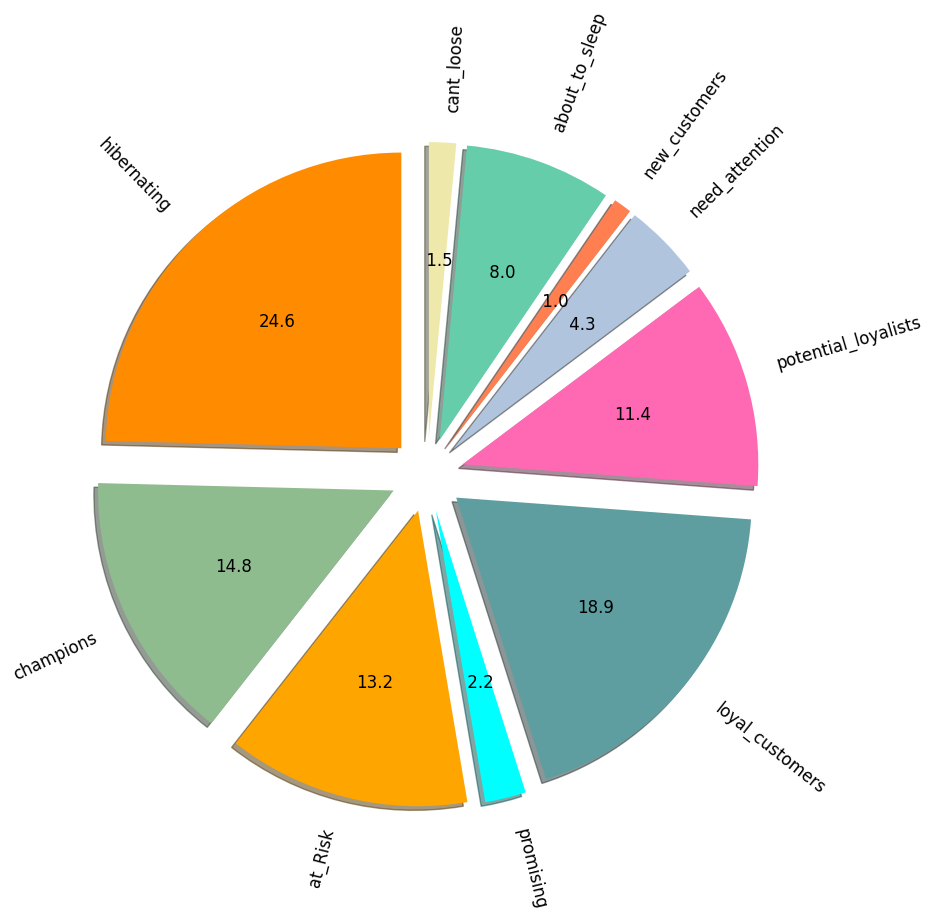

In [36]:
colors  = ("darkorange", "darkseagreen", "orange", "cyan", "cadetblue", "hotpink", "lightsteelblue", "coral",  "mediumaquamarine","palegoldenrod")
explodes = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]

rfm_df["Segment"].value_counts(sort=False).plot.pie(colors=colors,
                                                 textprops={'fontsize': 12}, 
                                                 autopct = '%4.1f',
                                                 startangle= 90, 
                                                 radius =2, 
                                                 rotatelabels=True,
                                                 shadow = True, 
                                                 explode = explodes)
plt.ylabel("");


***Build Marketing Strategies***

In [37]:
rfm_df[["recency", "frequency", "monetary"]].agg(["mean"])

,recency,frequency,monetary
mean,93.327,4.230,1803.687


In [38]:
rfm_df[["Segment","recency", "frequency", "monetary"]].groupby("Segment").agg(["mean", "count","sum"])

recency               frequency             monetary  \
                       mean count     sum      mean count   sum     mean   
Segment                                                                    
about_to_sleep       54.553   347   18930     1.150   347   399  396.453   
at_Risk             155.824   573   89287     2.836   573  1625  864.408   
cant_loose          136.109    64    8711     8.281    64   530 2461.274   
champions             7.039   641    4512    12.165   641  7798 5979.933   
hibernating         218.144  1064  232105     1.098  1064  1168  444.074   
loyal_customers      34.787   818   28456     6.383   818  5221 2496.049   
need_attention       54.092   184    9953     2.299   184   423  788.853   
new_customers         8.070    43     347     1.000    43    43  344.076   
potential_loyalists  18.130   494    8956     2.002   494   989  956.580   
promising            24.567    97    2383     1.000    97    97  316.026   

                                       
                    count         sum  
Segment                                
about_to_sleep        347  137569.090  
at_Risk               573  495305.802  
cant_loose             64  157521.520  
champions             641 3833136.850  
hibernating          1064  472494.411  
loyal_customers       818 2041768.481  
need_attention        184  145148.880  
new_customers          43   14795.270  
potential_loyalists   494  472550.400  
promising              97   30654.500

Now, let's focus on some segments which can be critically important for marketing strategies

* champions
* loyal_customers
* cant_loose
* need_attention 



* **Champions:**

This segment constitutes 15% of the customer portfolio and also it includes 641 customers who have made their last purchases within the last week and generate an average turnover of 6000 TL. Because of this segment consists of customers  most frequently spends and can easily  adopt to new products and services, cross-sales strategies can be taken for this segment.



* **Loyal Customers:**

There are 818 customers in this segment, and while the purchasing frequency is 4 on average in all customer segments, it has been seen that average purchases are 2 times higher in this segment (average of frequency is 8). The average monetary value of this segment is 50% above the general average. 

As a conclusion,  in order to ensure customer loyalty sustainable, cross-sell communications in line with customer expectations and needs can be organized for this segment.






* **Need_Attention:**


There are 184 customers that last purchased nearly 2 months ago in this segment. Although they dont make purchase frequently,  total transaction amounts of these customers contribute to profitability. 

As a result, Cashback and bonus campaigns can be organized for this segment to retain customers and even move them to a segment that makes more purchases. In fact, discounted product offers and campaigns based on gift coupons can be planned  by observing  habits of other customers with similar behaviors, and analyzing according product association rules.

* **Can't_loose:** 

Customers of Can't_Loose segment have a higher transaction frequency, even though their spending amounts are close to the loyal customer segment. However, since these customers are nearly lost customers that made last purchases nearly 4 months ago.

So, new campaign strategies based on rewards, discounts, and other special incentives as a way to attract and retain customers can be planned in order to make them feel special and loyal again. 